In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def N_single_qubit_gates_req_Rot(N_system_qubits, set_size):
    return (2*N_system_qubits+1)*(set_size-1)
def N_CNOT_gates_req_Rot(N_system_qubits, set_size):
    return 2*(N_system_qubits-1)*(set_size-1)

In [3]:
def N_cV_gates_req_LCU(N_system_qubits, set_size):
    Na=np.ceil(np.log2(set_size))
    return (N_system_qubits*((2**Na) -1)) *(set_size-1)
def N_CNOT_gates_req_LCU(N_system_qubits, set_size):
    Na=np.ceil(np.log2(set_size))
    return ((2**Na) -2) *(set_size-1)

In [4]:
## better

# O(2 N_system) change of basis single qubit gates
# O(2 [N_system-1]) CNOT gates
# 2 * Hadamard gates
# 1 m-controlled Tofolli gate!

## overall reduction = 16m-32
## requiring (m-2) garbage bits --> ALWAYS PRESENT IN SYSTEM REGISTER!!!

def N_single_qubit_gates_req_LCU_new_Decomp(N_system_qubits, set_size):
    change_of_basis = 2*N_system_qubits
    H_gates = 2
    
    return (change_of_basis+H_gates)*(set_size-1)
    

def N_CNOT_gates_req_LCU_new_Decomp(N_system_qubits, set_size):
    
    cnot_Gates = 2*(N_system_qubits-1)
    
    Na=np.ceil(np.log2(set_size))
    
    ## perez gates
    N_perez_gates = 4*(Na-2)
    
    N_CNOT_in_perez = N_perez_gates*1
    N_cV_gates_in_perez = N_perez_gates*3
       
    if ((16*Na-32)!=(N_CNOT_in_perez+N_cV_gates_in_perez)).all():
        raise ValueError('16m-32 is the expected decomposition!')
#     if np.array_equal((16*Na-32), (N_CNOT_in_perez+N_cV_gates_in_perez)):
#         raise ValueError('16m-32 is the expected decomposition!')
    
    return ((cnot_Gates+N_CNOT_in_perez)*(set_size-1)) , (N_cV_gates_in_perez*(set_size-1))

In [5]:
x_nsets=np.arange(2,200,1)

In [6]:
# Data for plotting
N_system_qubits=4
y_rot_single=N_single_qubit_gates_req_Rot(N_system_qubits, x_nsets)
y_rot_CNOT = N_CNOT_gates_req_Rot(N_system_qubits, x_nsets)

y_LCU_cV=N_cV_gates_req_LCU(N_system_qubits, x_nsets)
y_LCU_CNOT = N_CNOT_gates_req_LCU(N_system_qubits, x_nsets)

y_LCU_single_NEW=N_single_qubit_gates_req_LCU_new_Decomp(N_system_qubits, x_nsets)
y_LCU_CNOT_NEW, y_LCU_cV_NEW = N_CNOT_gates_req_LCU_new_Decomp(N_system_qubits, x_nsets)

<IPython.core.display.Javascript object>


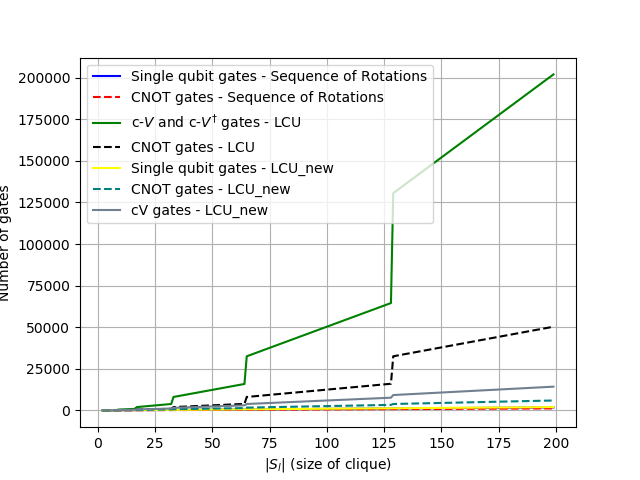

In [7]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.plot(x_nsets, y_rot_single, color='b', label='Single qubit gates - Sequence of Rotations')
ax.plot(x_nsets, y_rot_CNOT, color='r', linestyle='--', label='CNOT gates - Sequence of Rotations')

ax.plot(x_nsets, y_LCU_cV, color='g', label='c-$V$ and c-$V^{\dagger}$ gates - LCU')
ax.plot(x_nsets, y_LCU_CNOT, color='k', label='CNOT gates - LCU', linestyle='--')

ax.plot(x_nsets, y_LCU_single_NEW, color='yellow', label='Single qubit gates - LCU_new')
ax.plot(x_nsets, y_LCU_CNOT_NEW, color='teal', linestyle='--', label='CNOT gates - LCU_new')
ax.plot(x_nsets, y_LCU_cV_NEW, color='slategrey', label='cV gates - LCU_new')



ax.set(xlabel='$|S_{l}|$ (size of clique)', ylabel='Number of gates')
#                                         ,title='Scaling of methods')
ax.grid()
plt.legend()

# # http://akuederle.com/matplotlib-zoomed-up-inset
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
# # axins = zoomed_inset_axes(ax, 40, loc='center') # zoom-factor: 2.5, location: upper-left
# axins = inset_axes(ax, 2,1 , loc='center',bbox_to_anchor=(0.4, 0.55),bbox_transform=ax.figure.transFigure) # no zoom

# axins.plot(x_nsets, y_rot_single, color='b')
# axins.plot(x_nsets, y_rot_CNOT, color='r', linestyle='--')
# axins.plot(x_nsets, y_LCU_cV, color='g')
# axins.plot(x_nsets, y_LCU_CNOT, color='k', linestyle='--')

# x1, x2, y1, y2 = 2, 5, 0, 50 # specify the limits
# axins.set_xlim(x1, x2) # apply the x-limits
# axins.set_ylim(y1, y2) # apply the y-limits
# # axins.set_yticks(np.arange(0, 100, 20))
# plt.yticks(visible=True)
# plt.xticks(visible=True)

# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5") # loc here is which corner zoom goes to!



# fig.savefig("test.png")
plt.show()

In [ ]:
# %matplotlib notebook

# fig, ax = plt.subplots()

# ax.plot(x_nsets, y_rot_single, color='b', label='Single qubit gates - Sequence of Rotations')
# ax.plot(x_nsets, y_rot_CNOT, color='r', label='CNOT gates - Sequence of Rotations')

# ax.plot(x_nsets, y_LCU_single, color='g', label='c-$V$ and c-$V^{\dagger}$ gates - LCU')
# ax.plot(x_nsets, y_LCU_CNOT, color='k', label='CNOT gates - LCU', linestyle='--')

# ax.set(xlabel='$|S_{l}|$ (size of clique)', ylabel='Number of gates',
#        title='Scaling of methods')
# ax.grid()
# plt.legend()

# # http://akuederle.com/matplotlib-zoomed-up-inset
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# axins = zoomed_inset_axes(ax, 40, loc='center') # zoom-factor: 2.5, location: upper-left
# axins.plot(x_nsets, y_rot_single, color='b')
# axins.plot(x_nsets, y_rot_CNOT, color='r')
# axins.plot(x_nsets, y_LCU_single, color='g')
# axins.plot(x_nsets, y_LCU_CNOT, color='k', linestyle='--')

# x1, x2, y1, y2 = 2, 4, 0, 100 # specify the limits
# axins.set_xlim(x1, x2) # apply the x-limits
# axins.set_ylim(y1, y2) # apply the y-limits
# # axins.set_yticks(np.arange(0, 100, 20))
# plt.yticks(visible=True)
# plt.xticks(visible=True)

# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5") # loc here is which corner zoom goes to!



# # fig.savefig("test.png")
# plt.show()

In [ ]:
# Data for plotting
N_system_qubits=10 # < ---- CHANGED
y_rot_single=N_single_qubit_gates_req_Rot(N_system_qubits, x_nsets)
y_rot_CNOT = N_CNOT_gates_req_Rot(N_system_qubits, x_nsets)

y_LCU_cV=N_cV_gates_req_LCU(N_system_qubits, x_nsets)
y_LCU_CNOT = N_CNOT_gates_req_Rot(N_system_qubits, x_nsets)

y_LCU_single_NEW=N_single_qubit_gates_req_LCU_new_Decomp(N_system_qubits, x_nsets)
y_LCU_CNOT_NEW, y_LCU_cV_NEW = N_CNOT_gates_req_LCU_new_Decomp(N_system_qubits, x_nsets)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.plot(x_nsets, y_rot_single, color='b', label='Single qubit gates - Sequence of Rotations')
ax.plot(x_nsets, y_rot_CNOT, color='r', label='CNOT gates - Sequence of Rotations')

ax.plot(x_nsets, y_LCU_cV, color='g', label='c-$V$ and c-$V^{\dagger}$ gates - LCU')
ax.plot(x_nsets, y_LCU_CNOT, color='k', label='CNOT gates - LCU', linestyle='--')

ax.plot(x_nsets, y_LCU_single_NEW, color='yellow', label='Single qubit gates - LCU_new')
ax.plot(x_nsets, y_LCU_CNOT_NEW, color='teal', linestyle='--', label='CNOT gates - LCU_new')
ax.plot(x_nsets, y_LCU_cV_NEW, color='slategrey', label='cV gates - LCU_new')

ax.set(xlabel='$|S_{l}|$ (size of clique)', ylabel='Number of gates')
#                                         ,title='Scaling of methods')
ax.grid()
plt.legend()

# # # http://akuederle.com/matplotlib-zoomed-up-inset
# # from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
# # # axins = zoomed_inset_axes(ax, 40, loc='center') # zoom-factor: 2.5, location: upper-left
# axins = inset_axes(ax, 2,1 , loc='center',bbox_to_anchor=(0.4, 0.55),bbox_transform=ax.figure.transFigure) # no zoom

# axins.plot(x_nsets, y_rot_single, color='b')
# axins.plot(x_nsets, y_rot_CNOT, color='r')
# axins.plot(x_nsets, y_LCU_cV, color='g')
# axins.plot(x_nsets, y_LCU_CNOT, color='k', linestyle='--')

# x1, x2, y1, y2 = 2, 3, 0, 50 # specify the limits
# axins.set_xlim(x1, x2) # apply the x-limits
# axins.set_ylim(y1, y2) # apply the y-limits

# axins.set_xticks(np.arange(2, 4, 1))
# plt.yticks(visible=True)
# plt.xticks(visible=True)

# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5") # loc here is which corner zoom goes to!

# # fig.savefig("test.png")
plt.show()

In [ ]:
# Data for plotting
N_system_qubits=100 # < ---- CHANGED
y_rot_single=N_single_qubit_gates_req_Rot(N_system_qubits, x_nsets)
y_rot_CNOT = N_CNOT_gates_req_Rot(N_system_qubits, x_nsets)

y_LCU_cV=N_cV_gates_req_LCU(N_system_qubits, x_nsets)
y_LCU_CNOT = N_CNOT_gates_req_Rot(N_system_qubits, x_nsets)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.plot(x_nsets, y_rot_single, color='b', label='Single qubit gates - Sequence of Rotations', linewidth=3)
ax.plot(x_nsets, y_rot_CNOT, color='r', label='CNOT gates - Sequence of Rotations')

ax.plot(x_nsets, y_LCU_cV, color='g', label='c-$V$ and c-$V^{\dagger}$ gates - LCU')
ax.plot(x_nsets, y_LCU_CNOT, color='k', label='CNOT gates - LCU', linestyle='--')

ax.set(xlabel='$|S_{l}|$ (size of clique)', ylabel='Number of gates')
#                                         ,title='Scaling of methods')
ax.grid()
plt.legend()

# http://akuederle.com/matplotlib-zoomed-up-inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
# axins = zoomed_inset_axes(ax, 40, loc='center') # zoom-factor: 2.5, location: upper-left
axins = inset_axes(ax, 2,1 , loc='center',bbox_to_anchor=(0.4, 0.55),bbox_transform=ax.figure.transFigure) # no zoom

axins.plot(x_nsets, y_rot_single, color='b', linewidth=2)
axins.plot(x_nsets, y_rot_CNOT, color='r')
axins.plot(x_nsets, y_LCU_cV, color='g')
axins.plot(x_nsets, y_LCU_CNOT, color='k', linestyle='--')

x1, x2, y1, y2 = 1.5, 3, 90, 500 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
# axins.set_yticks(np.arange(0, 100, 20))
plt.yticks(visible=True)
plt.xticks(visible=True)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5") # loc here is which corner zoom goes to!



# fig.savefig("test.png")
plt.show()

In [ ]:
# Data for plotting
N_system_qubits=1
y_rot_single=N_single_qubit_gates_req_Rot(N_system_qubits, x_nsets)
y_rot_CNOT = N_CNOT_gates_req_Rot(N_system_qubits, x_nsets)

y_LCU_cV=N_cV_gates_req_LCU(N_system_qubits, x_nsets)
y_LCU_CNOT = N_CNOT_gates_req_LCU(N_system_qubits, x_nsets)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.plot(x_nsets, y_rot_single, color='b', label='Single qubit gates - Sequence of Rotations')
ax.plot(x_nsets, y_rot_CNOT, color='r', linestyle='--', label='CNOT gates - Sequence of Rotations')

ax.plot(x_nsets, y_LCU_cV, color='g', label='c-$V$ and c-$V^{\dagger}$ gates - LCU')
ax.plot(x_nsets, y_LCU_CNOT, color='k', label='CNOT gates - LCU', linestyle='--')

ax.set(xlabel='$|S_{l}|$ (size of clique)', ylabel='Number of gates')
#                                         ,title='Scaling of methods')
ax.grid()
plt.legend()

# http://akuederle.com/matplotlib-zoomed-up-inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
# axins = zoomed_inset_axes(ax, 40, loc='center') # zoom-factor: 2.5, location: upper-left
axins = inset_axes(ax, 2,1 , loc='center',bbox_to_anchor=(0.4, 0.55),bbox_transform=ax.figure.transFigure) # no zoom

axins.plot(x_nsets, y_rot_single, color='b')
axins.plot(x_nsets, y_rot_CNOT, color='r', linestyle='--')
axins.plot(x_nsets, y_LCU_cV, color='g')
axins.plot(x_nsets, y_LCU_CNOT, color='k', linestyle='--')

x1, x2, y1, y2 = 2, 3, -5, 10 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
# axins.set_yticks(np.arange(0, 100, 20))
axins.set_xticks(np.arange(2, 4, 1))
plt.yticks(visible=True)
plt.xticks(visible=True)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5") # loc here is which corner zoom goes to!



# fig.savefig("test.png")
plt.show()

In [ ]:
# Data for plotting
N_system_qubits=5
x_nsets=2

print(N_single_qubit_gates_req_Rot(N_system_qubits, x_nsets))
print(N_CNOT_gates_req_Rot(N_system_qubits, x_nsets))

print('###')

print(N_cV_gates_req_LCU(N_system_qubits, x_nsets))
print(N_CNOT_gates_req_LCU(N_system_qubits, x_nsets))
print(4)

In [ ]:
### results for |S_l|=2
X_no_system_qubits=np.arange(1,11,1)
x_nsets=2

y_rot_single=N_single_qubit_gates_req_Rot(X_no_system_qubits, x_nsets)
y_rot_CNOT = N_CNOT_gates_req_Rot(X_no_system_qubits, x_nsets)

y_LCU_cV=N_cV_gates_req_LCU(X_no_system_qubits, x_nsets)
# y_LCU_CNOT = N_CNOT_gates_req_LCU(X_no_system_qubits, x_nsets)
y_LCU_CNOT=np.zeros(len(X_no_system_qubits))
single_qubit_LCU_gates=np.array([4 for _ in range(len(X_no_system_qubits))])

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.plot(X_no_system_qubits, y_rot_single, color='b', label='Single qubit gates - Sequence of Rotations')
ax.plot(X_no_system_qubits, y_rot_CNOT, color='r', linestyle='-', label='CNOT gates - Sequence of Rotations')

ax.plot(X_no_system_qubits, y_LCU_cV, color='g', label='single controlled $\sigma$ gates - LCU')
ax.plot(X_no_system_qubits, y_LCU_CNOT, color='k', label='CNOT gates - LCU', linestyle='-')
ax.plot(X_no_system_qubits, single_qubit_LCU_gates, color='m', label='Single qubit gates - LCU', linestyle='-')

ax.set(xlabel='$N_{s}$', ylabel='Number of gates')
#                                         ,title='Scaling of methods')

ax.set_xticks(X_no_system_qubits)

ax.grid()
plt.legend()

# # http://akuederle.com/matplotlib-zoomed-up-inset
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
# # axins = zoomed_inset_axes(ax, 40, loc='center') # zoom-factor: 2.5, location: upper-left
# axins = inset_axes(ax, 2,1 , loc='center',bbox_to_anchor=(0.4, 0.55),bbox_transform=ax.figure.transFigure) # no zoom

# axins.plot(x_nsets, y_rot_single, color='b')
# axins.plot(x_nsets, y_rot_CNOT, color='r', linestyle='--')
# axins.plot(x_nsets, y_LCU_cV, color='g')
# axins.plot(x_nsets, y_LCU_CNOT, color='k', linestyle='--')

# x1, x2, y1, y2 = 2, 3, -5, 10 # specify the limits
# axins.set_xlim(x1, x2) # apply the x-limits
# axins.set_ylim(y1, y2) # apply the y-limits
# # axins.set_yticks(np.arange(0, 100, 20))
# axins.set_xticks(np.arange(2, 4, 1))
# plt.yticks(visible=True)
# plt.xticks(visible=True)

# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5") # loc here is which corner zoom goes to!



# fig.savefig("test.png")
plt.show()

In [ ]:
V = ((1j+1)/2)*np.array([[1,-1j],[-1j, 1]], dtype=complex)

In [ ]:

CNOT

In [ ]:
from functools import reduce

zero=np.array([[1],[0]])
one=np.array([[0],[1]])
identity=np.eye(2)
X=np.array([[0,1], [1,0]])

CNOT= np.kron(np.outer(one, one), X)+np.kron(np.outer(zero, zero), identity)


###
I_one_V = reduce(np.kron, [identity, np.kron(np.outer(one, one), V)+np.kron(np.outer(zero, zero), identity)])
###
zero_zero=np.kron(zero,zero)
zero_one=np.kron(zero,one)
one_zero=np.kron(one,zero)
one_one=np.kron(one,one)

one_I_V = np.kron(np.outer(zero_zero, zero_zero), identity)+np.kron(np.outer(zero_one, zero_one), identity)+ \
         np.kron(np.outer(one_zero, one_zero), V)+np.kron(np.outer(one_one, one_one), V)
###

CNOT_I=reduce(np.kron, [CNOT, identity])
##
I_one_Vdag = reduce(np.kron, [identity, np.kron(np.outer(one, one), V.conj().transpose())+np.kron(np.outer(zero, zero), identity)])
##

perez_gate = reduce(np.multiply, [I_one_V, one_I_V, CNOT_I, I_one_Vdag])

In [ ]:
##check

# peres = TOF(x0,x1,x2) CNOT(x0, x1)

zero_zero=np.kron(zero,zero)
zero_one=np.kron(zero,one)
one_zero=np.kron(one,zero)
one_one=np.kron(one,one)

TOF = np.kron(np.outer(zero_zero, zero_zero), identity)+np.kron(np.outer(zero_one, zero_one), identity)+ \
         np.kron(np.outer(one_zero, one_zero), identity)+np.kron(np.outer(one_one, one_one), X)

CNOT_I = reduce(np.kron, [CNOT, identity])

checker = np.multiply(CNOT_I, TOF)

In [ ]:
checker==perez_gate

In [ ]:
print(perez_gate)